Thank You Madhu Sanjeevi for the lesson

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

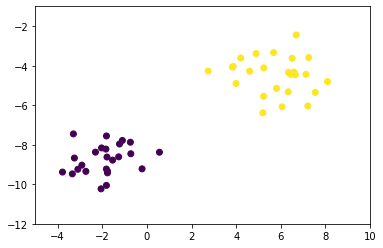

In [7]:
(X,y) = make_blobs(n_samples=50, n_features=2,centers=2,cluster_std=1.05,random_state=40)
X1 = np.c_[np.ones(X.shape[0]),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [0]:
positifX=[]
negatifX=[]
for i,value in enumerate(y):
  if value==0:
    negatifX.append(X[i])
  else:
    positifX.append(X[i])

data_dict= {-1:np.array(negatifX), 1:np.array(positifX)}

In [0]:
weight=[]
bias=[]

max_feature_value=float('-inf')
min_feature_value=float('+inf')

for yi in data_dict:
  if np.amax(data_dict[yi]) > max_feature_value:
    max_feature_value=np.amax(data_dict[yi])
  if np.amin(data_dict[yi]) < min_feature_value:
    min_feature_value=np.amin(data_dict[yi])

learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001]

In [0]:
def SVM_Training(data_dict):
  i=1
  global weight
  global bias
  length_Wvector = {}
  transform = [[1,1],[-1,1],[-1,-1],[1,-1]]

  b_step_size = 2
  b_multiple = 5
  w_optimum = max_feature_value*0.5

  for lrate in learning_rate:
    weight= np.array([w_optimum,w_optimum])
    optimized=False
    while not optimized:
      for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
        for transformation in transform:
          w_t = weight*transformation

          correctly_classified=True

          for yi in data_dict:
            for xi in data_dict[yi]:
              if yi*(np.dot(w_t,xi)+b) < 1:
                correctly_classified=False
          
          if correctly_classified:
            length_Wvector[np.linalg.norm(w_t)] = [w_t,b]
      
      if weight[0] < 0:
        optimized = True
      else:
        weight = weight - lrate
    
    norms = sorted([n for n in length_Wvector])

    minimum_wlength = length_Wvector[norms[0]]
    weight = minimum_wlength[0]
    bias = minimum_wlength[1]

    w_optimum = weight[0]+lrate*2

In [0]:
SVM_Training(data_dict)

In [0]:
def hyperplane_value(x,w,b,v):
  return (-w[0]*x-b+v)/w[1]

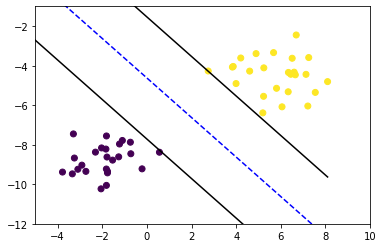

In [35]:
colors = {1:'r', -1:'b'}
fig=plt.figure()
ax=fig.add_subplot(1,1,1)


plt.scatter(X1[:,1],X1[:,2],marker='o', c=y)
datarange = (min_feature_value*0.9,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]

psv1= hyperplane_value(hyp_x_min,weight,bias,1)
psv2 = hyperplane_value(hyp_x_max,weight,bias,1)
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')

nsv1= hyperplane_value(hyp_x_min,weight,bias,-1)
nsv2 = hyperplane_value(hyp_x_max,weight,bias,-1)
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')

db1= hyperplane_value(hyp_x_min,weight,bias,0)
db2 = hyperplane_value(hyp_x_max,weight,bias,0)
ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'b--')

plt.axis([-5,10,-12,-1])
plt.show()